## 標記可見光譜線
標記 BPT diagram 會用到的那四條，以及附近的強發射線。  
主要是這個 cube 太他媽巨寬了，CARTA line query 找不太動，所以用小蛇  

- 程式的湯底參考：  
**紅魚** (https://github.com/000RF/2025-summer) 的 fake_script_haha.ipynb  
可能進行一些改動 (移掉 smooth 的功能)  
    

- 線的波長資訊參考：  
標題叫 **Jet-mode feedback in NGC 5972: insights from resolved MUSE, GMRT and VLA observations**  的論文  
https://iopscience.iop.org/article/10.3847/1538-4357/adc38d/pdf


- cube(IFU) 來源 :  
ESO Arcnive   
Instrument          : VLT MUSE(single)  
Object              : Circinus  
Range(air $\lambda$): 4759-9320 Å（補藥換成頻率啊）      
pID                 : 094.B-0321

In [31]:
# modular
import pandas as pd
import matplotlib.pyplot as plt

In [32]:
# get data file
file_path = "/Users/aqing/Documents/1004/Circinus_galaxy/ionized-gas/VLT/MUSE_circinus_cube_axis-WaveLength_gasRegion.tsv" # inp .tsv

# df = data file
df = pd.read_csv(file_path, sep="\t", skiprows=5) # 打開 .tsv 看看，前五行需要跳過
df.columns = [col.strip().lstrip("#").strip() for col in df.columns]
df[df.columns[0]] = pd.to_numeric(df[df.columns[0]], errors='coerce') # 「 df.coiumns[0] 」代表第0欄的藍標題，就和df['FREQ']這是一個意思
df[df.columns[1]] = pd.to_numeric(df[df.columns[1]], errors='coerce') # pd.to_numeric(errors='coerce') 在遇到不是數字的直的時候，標記為 NaN
df = df.dropna()

x = df[df.columns[0]] # 處理過後再讀入變數
y = df[df.columns[1]] 
'''
xlabel = AirWavelength (Angstrom)
ylabel = Mean [10(-20).erg/s/cm2/Angstrom]
'''

'\nxlabel = AirWavelength (Angstrom)\nylabel = Mean [10(-20).erg/s/cm2/Angstrom]\n'

### Lines' info

In [ ]:
# Line info
z = 0.001448 # redshift of Circinus

# (shifted_wave_lenght [Ang], line_name, color)
bpt_lines = [((1+z)*6584, 'N[II]', 'r'),
             ((1+z)*6563, 'H-alpha', (1, 0.5, 0)),
             ((1+z)*5007, 'O[III]', 'c'),
             ((1+z)*4861, 'H-beta', 'b')]

# (line_name, shifted_wave_lenght [Ang])
emission_lines = [('H-beta*', (1+z)*4861), # 為什麼分兩邊寫因為我是瓠瓜
                  ('O[III]_4958', (1+z)*4958), 
                  ('O[III]_5007*', (1+z)*5007),
                  ('H-alpha*', (1+z)*6562),
                  ('N[II]_6548', (1+z)*6548),
                  ('N[II]_6583*', (1+z)*6583),
                  ('O[I]', (1+z)*6300),
                  #('Ar[III]', (1+z)*7135),
                  ('S[II]_6716', (1+z)*6716),
                  ('S[II]_6730', (1+z)*6730)]

print('These lines iwll be masked : ')
for n, l in emission_lines:
    print(f'> {n} : shifted wave lenght = {l:.2f} Å ')

These lines iwll be masked : 
> H-beta* : shifted wave lenght = 4868.04 Å 
> O[III]_4958 : shifted wave lenght = 4965.18 Å 
> O[III]_5007* : shifted wave lenght = 5014.25 Å 
> H-alpha* : shifted wave lenght = 6571.50 Å 
> N[II]_6548 : shifted wave lenght = 6557.48 Å 
> N[II]_6583* : shifted wave lenght = 6592.53 Å 
> O[I] : shifted wave lenght = 6309.12 Å 
> S[II]_6716 : shifted wave lenght = 6725.72 Å 
> S[II]_6730 : shifted wave lenght = 6739.75 Å 


### BPT lines
標記一下，確定這個 cube 真的能用  
當然能用，因為上次有一個瓠瓜在亂做所以才會是那個怪東西

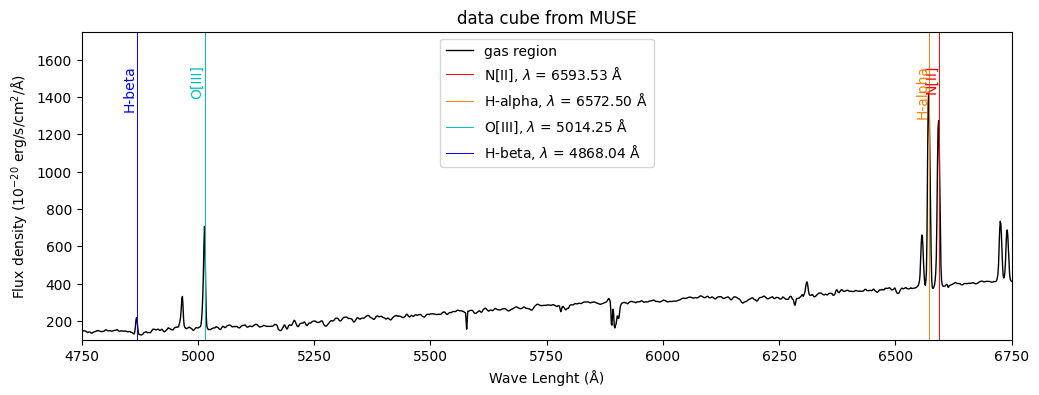

In [ ]:
# 我跟你說，全部畫一張圖的下場就是一坨
plt.figure(figsize=(12, 4))

plt.plot(x, y, c='k', lw=1, label="gas region")
plt.xlim(4750, 6750) # Ang
ymax = 1750
plt.ylim(100, ymax) # 超可悲之隨便設變數
plt.xlabel("Wave Lenght (Å)")
plt.ylabel(r"Flux density ($10^{-20}$ erg/s/cm$^2$/Å)") # 倆 $ 啟用 latex
plt.title("data cube from MUSE")

for l, name, color in bpt_lines :
    plt.axvline(l, color=color, linestyle="-", lw=0.7, label=f'{name}, $\lambda$ = {l:.2f} Å')
    if name == 'N [II]' :
        plt.text(l, ymax*0.9, name, rotation=90, color=color, fontsize=10, ha='left', va='top')
    else :
        plt.text(l, ymax*0.9, name, rotation=90, color=color, fontsize=10, ha='right', va='top')

plt.legend()
plt.show()

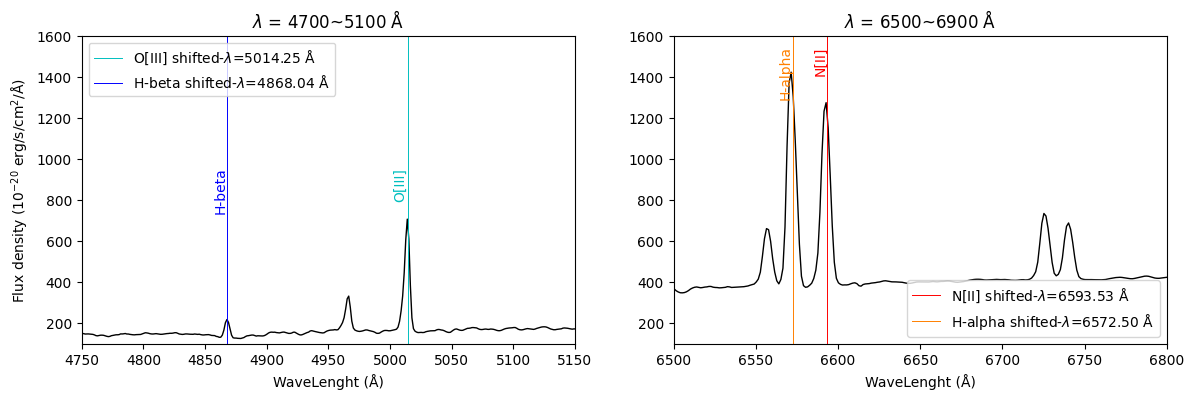

In [ ]:
# bpt 的橫軸縱軸分開畫耶耶
fig, ax = plt.subplots(1, 2, figsize=(14, 4))

ax[1].plot(x, y, c='k', lw=1)
ax[1].set_xlim(6500, 6800) # [Å]
ymax = 1600
ax[1].set_ylim(100, ymax)
ax[1].set_xlabel("WaveLenght (Å)")
ax[0].set_ylabel("Flux density ($10^{-20}$ erg/s/cm$^2$/Å)")
ax[1].set_title("$\lambda$ = 6500~6900 Å")
for l, name, c in bpt_lines :
    if name in ['H-alpha', 'N[II]'] :
        ax[1].axvline(l, color=c, linestyle="-", lw=0.7, label=f'{name} shifted-$\lambda$={l:.2f} Å') # :.2f 代表顯示兩位浮點數
        ax[1].text(l, ymax*0.97, name, rotation=90, color=c, fontsize=10, ha='right', va='top')
ax[1].legend(loc='lower right')

ax[0].plot(x, y, c='k', lw=1)
ax[0].set_xlim(4750, 5150) # [Å]
ymax = 1600
ax[0].set_ylim(100, ymax)
ax[0].set_xlabel("WaveLenght (Å)")
ax[1].set_ylabel('')
ax[0].set_title("$\lambda$ = 4700~5100 Å")
for l, name, c in bpt_lines :
     if name in ['H-beta', 'O[III]']:
        ax[0].axvline(l, color=c, linestyle="-", lw=0.7, label=f'{name} shifted-$\lambda$={l:.2f} Å')
        ax[0].text(l, ymax*0.6, name, rotation=90, color=c, fontsize=10, ha='right', va='top')
ax[0].legend(loc='upper left')

plt.show()

### Emission lines
lines' ref :  
Jet-mode feedback in NGC 5972: insights from resolved MUSE, GMRT and VLA observations  
https://iopscience.iop.org/article/10.3847/1538-4357/adc38d/pdf  
進行類似 template 的參考。

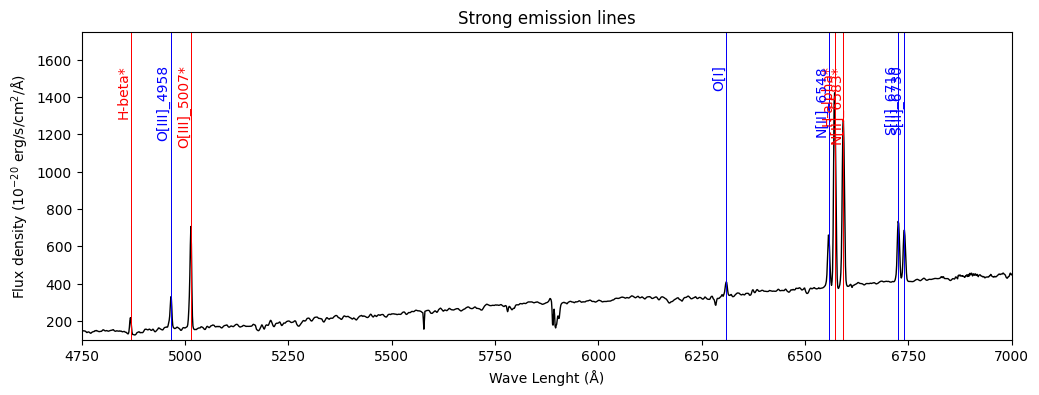

In [ ]:
# 發射線大圖
plt.figure(figsize=(12, 4))
plt.plot(x, y, c='k', lw=1, label="gas region")
plt.xlim(4750, 7000) # Ang
ymax = 1750
plt.ylim(100, ymax) # 超可悲之隨便設變數
plt.xlabel("Wave Lenght (Å)")
plt.ylabel(r"Flux density ($10^{-20}$ erg/s/cm$^2$/Å)") # 倆 $ 啟用 latex
plt.title("Strong emission lines")

for n, l in emission_lines :
    plt.axvline(l, color='r', linestyle="-", lw=0.7, label=f'{n}, $\lambda$ = {l:.0f} Å')
    if  '*' in n :
        c='r'
    else :
        c='b'
    plt.axvline(l, color=c, linestyle="-", lw=0.7, label=f'{n}, $\lambda$ = {l:.0f} Å')
    plt.text(l, ymax*0.9, n, rotation=90, color=c, fontsize=10, ha='right', va='top')
    
plt.show()

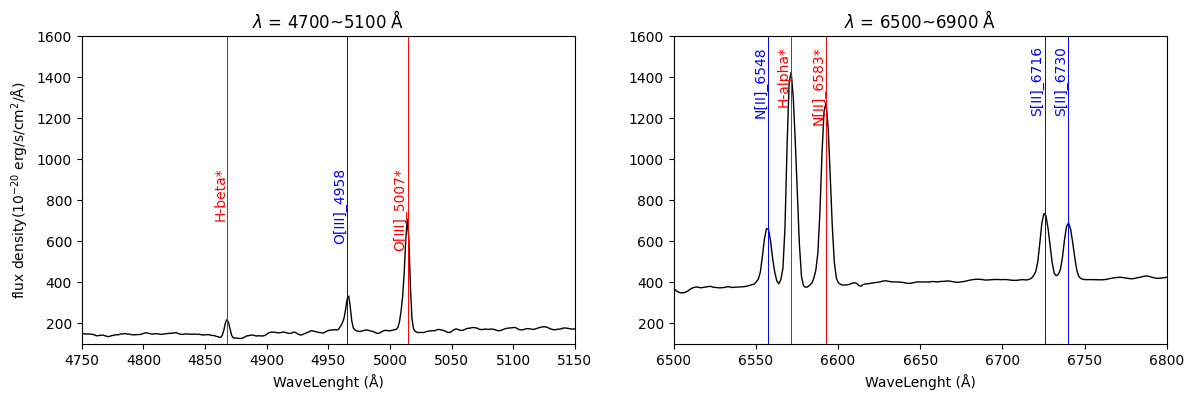

In [40]:
# 小段

fig, ax = plt.subplots(1, 2, figsize=(14, 4))

ax[1].plot(x, y, c='k', lw=1)
ax[1].set_xlim(6500, 6800) # [Å]
ymax = 1600
ax[1].set_ylim(100, ymax)
ax[1].set_xlabel("WaveLenght (Å)")
ax[0].set_ylabel("flux density($10^{-20}$ erg/s/cm$^2$/Å)")
ax[1].set_title("$\lambda$ = 6500~6900 Å")
for n, l in emission_lines :
    if n in ['H-alpha*', 'N[II]_6548', 'N[II]_6583*', 'S[II]_6716', 'S[II]_6730'] :
        if '*' in n :
            c='r'
        else :
            c='b'
        ax[1].axvline(l, color=c, linestyle="-", lw=0.7, label=f'{n} shifted-$\lambda$={l:.2f} Å') # :.2f 代表顯示兩位浮點數
        ax[1].text(l, ymax*0.97, n, rotation=90, color=c, fontsize=10, ha='right', va='top')
#ax[1].legend(loc='lower right')

ax[0].plot(x, y, c='k', lw=1)
ax[0].set_xlim(4750, 5150) # [Å]
ymax = 1600
ax[0].set_ylim(100, ymax)
ax[0].set_xlabel("WaveLenght (Å)")
ax[1].set_ylabel('')
ax[0].set_title("$\lambda$ = 4700~5100 Å")
for n, l in emission_lines :
     if n in ['H-beta*', 'O[III]_4958', 'O[III]_5007*']:
        if '*' in n :
            c='r'
        else :
            c='b'
        ax[0].axvline(l, color=c, linestyle="-", lw=0.7, label=f'{n} shifted-$\lambda$={l:.2f} Å') # :.2f 代表顯示兩位浮點數
        ax[0].text(l, ymax*0.6, n, rotation=90, color=c, fontsize=10, ha='right', va='top')
#ax[1].legend(loc='upper left')

plt.show()